In [1]:
import numpy as np
import cv2
from skimage.feature import hog
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
import os
from sklearn.externals import joblib
from scipy.ndimage.measurements import label

In [2]:
%matplotlib inline

In [3]:
cars = (glob.glob('vehicles/**/*.png'))
print('Number of vehicles images:', len(cars))
notcars = (glob.glob('non-vehicles/**/*.png'))
print('Number of vehicles images:', len(notcars))

Number of vehicles images: 8792
Number of vehicles images: 8968


In [4]:
# Define a function to return some characteristics of the dataset 
def data_look(car_list, notcar_list):
    data_dict = {}
    # Define a key in data_dict "n_cars" and store the number of car images
    data_dict["n_cars"] = len(car_list)
    # Define a key "n_notcars" and store the number of notcar images
    data_dict["n_notcars"] = len(notcar_list)
    # Read in a test image, either car or notcar
    example_img = mpimg.imread(car_list[0])
    # Define a key "image_shape" and store the test image shape 3-tuple
    data_dict["image_shape"] = example_img.shape
    # Define a key "data_type" and store the data type of the test image.
    data_dict["data_type"] = example_img.dtype
    # Return data_dict
    return data_dict

Your function returned a count of 8792  cars and 8968  non-cars
of size:  (64, 64, 3)  and data type: float32


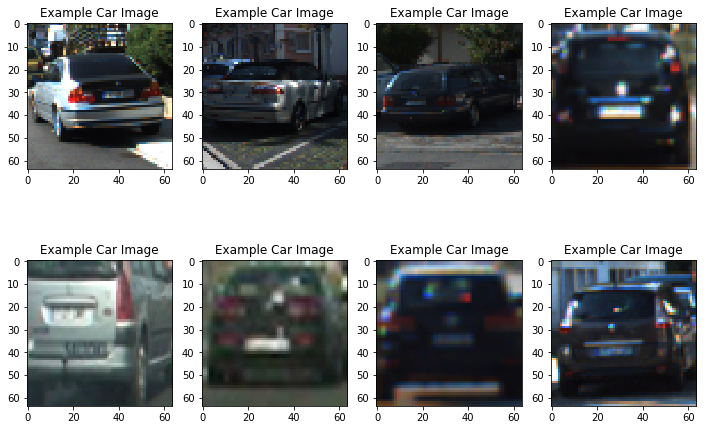

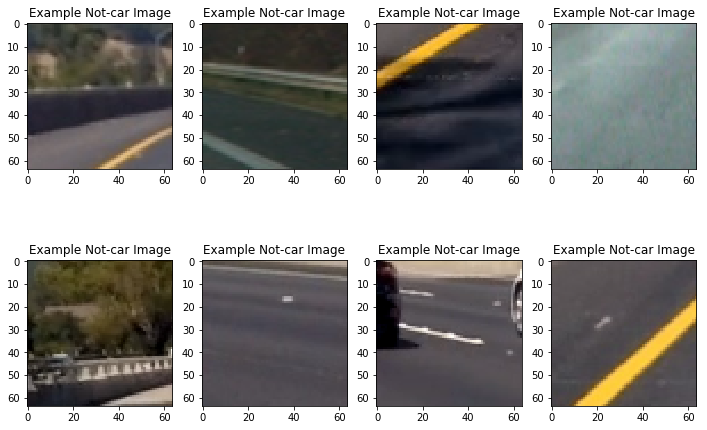

In [5]:
data_info = data_look(cars, notcars)

print('Your function returned a count of', 
      data_info["n_cars"], ' cars and', 
      data_info["n_notcars"], ' non-cars')
print('of size: ',data_info["image_shape"], ' and data type:', 
      data_info["data_type"])

# Plot the car examples
fig = plt.figure(figsize=(12,8))

for count in np.arange(1,9):
    # Just for fun choose random car / not-car indices and plot example images   
    car_ind = np.random.randint(0, len(cars))

    # Read in car / not-car images
    car_image = mpimg.imread(cars[car_ind])
    
    plt.subplot(2,4,count)
    plt.imshow(car_image)
    plt.title('Example Car Image')
plt.savefig("Sample_car_data.png", bbox_inches='tight')
plt.show()

# Plot the notcar examples
fig = plt.figure(figsize=(12,8))
for count in np.arange(1,9):
    notcar_ind = np.random.randint(0, len(notcars))
    
    notcar_image = mpimg.imread(notcars[notcar_ind])
    
    plt.subplot(2,4,count)
    plt.imshow(notcar_image)
    plt.title('Example Not-car Image')
plt.savefig("examples/Sample_nocar_data.png", bbox_inches='tight')
plt.show()

In [3]:
# Define a function to return HOG features and visualization
def get_hog_features(img, orient, pix_per_cell, cell_per_block, 
                        vis=False, feature_vec=True):
    # Call with two outputs if vis==True
    if vis == True:
        features, hog_image = hog(img, orientations=orient, 
                                  pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block), 
                                  transform_sqrt=True, 
                                  visualise=vis, feature_vector=feature_vec)
        return features, hog_image
    # Otherwise call with one output
    else:      
        features = hog(img, orientations=orient, 
                       pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block), 
                       transform_sqrt=True, 
                       visualise=vis, feature_vector=feature_vec)
        return features

/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


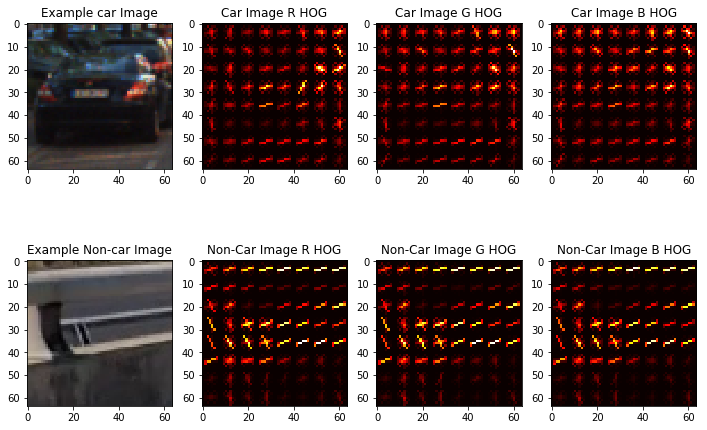

In [7]:
car_ind = np.random.randint(0, len(cars))
car_image = mpimg.imread(cars[car_ind])
_, car_dst_R = get_hog_features(car_image[:,:,0], 9, 8, 8, vis=True, feature_vec=True)
_, car_dst_G = get_hog_features(car_image[:,:,1], 9, 8, 8, vis=True, feature_vec=True)
_, car_dst_B = get_hog_features(car_image[:,:,2], 9, 8, 8, vis=True, feature_vec=True)

notcar_ind = np.random.randint(0, len(notcars)) 
notcar_image = mpimg.imread(notcars[notcar_ind])
_, noncar_dst_R = get_hog_features(notcar_image[:,:,0], 9, 8, 8, vis=True, feature_vec=True)
_, noncar_dst_G = get_hog_features(notcar_image[:,:,1], 9, 8, 8, vis=True, feature_vec=True)
_, noncar_dst_B = get_hog_features(notcar_image[:,:,2], 9, 8, 8, vis=True, feature_vec=True)

fig = plt.figure(figsize=(12,8))
plt.subplot(2,4,1)
plt.imshow(car_image)
plt.title('Example car Image')
plt.subplot(2,4,2)
plt.imshow(car_dst_R, cmap = 'hot')
plt.title('Car Image R HOG')
plt.subplot(2,4,3)
plt.imshow(car_dst_G, cmap = 'hot')
plt.title('Car Image G HOG')
plt.subplot(2,4,4)
plt.imshow(car_dst_B, cmap = 'hot')
plt.title('Car Image B HOG')
plt.subplot(2,4,5)
plt.imshow(notcar_image)
plt.title('Example Non-car Image')
plt.subplot(2,4,6)
plt.imshow(noncar_dst_R, cmap = 'hot')
plt.title('Non-Car Image R HOG')
plt.subplot(2,4,7)
plt.imshow(noncar_dst_G, cmap = 'hot')
plt.title('Non-Car Image G HOG')
plt.subplot(2,4,8)
plt.imshow(noncar_dst_B, cmap = 'hot')
plt.title('Non-Car Image B HOG')
plt.savefig("examples/Sample_HOG_data_RGB.png", bbox_inches='tight')

plt.show()

/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


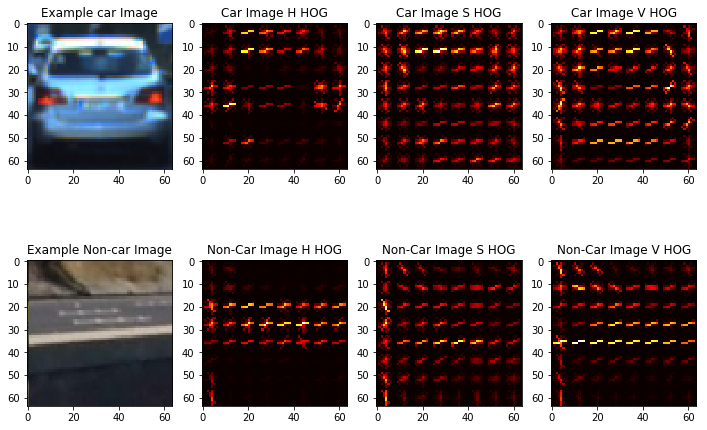

In [8]:
car_ind = np.random.randint(0, len(cars))
car_image_RGB = mpimg.imread(cars[car_ind])
car_image = cv2.cvtColor(car_image_RGB, cv2.COLOR_RGB2HSV)
_, car_dst_H = get_hog_features(car_image[:,:,0], 9, 8, 8, vis=True, feature_vec=True)
_, car_dst_S = get_hog_features(car_image[:,:,1], 9, 8, 8, vis=True, feature_vec=True)
_, car_dst_V = get_hog_features(car_image[:,:,2], 9, 8, 8, vis=True, feature_vec=True)

notcar_ind = np.random.randint(0, len(notcars)) 
notcar_image_RGB = mpimg.imread(notcars[notcar_ind])
notcar_image = cv2.cvtColor(notcar_image_RGB, cv2.COLOR_RGB2HSV)
_, noncar_dst_H = get_hog_features(notcar_image[:,:,0], 9, 8, 8, vis=True, feature_vec=True)
_, noncar_dst_S = get_hog_features(notcar_image[:,:,1], 9, 8, 8, vis=True, feature_vec=True)
_, noncar_dst_V = get_hog_features(notcar_image[:,:,2], 9, 8, 8, vis=True, feature_vec=True)

fig = plt.figure(figsize=(12,8))
plt.subplot(2,4,1)
plt.imshow(car_image_RGB)
plt.title('Example car Image')
plt.subplot(2,4,2)
plt.imshow(car_dst_H, cmap = 'hot')
plt.title('Car Image H HOG')
plt.subplot(2,4,3)
plt.imshow(car_dst_S, cmap = 'hot')
plt.title('Car Image S HOG')
plt.subplot(2,4,4)
plt.imshow(car_dst_V, cmap = 'hot')
plt.title('Car Image V HOG')
plt.subplot(2,4,5)
plt.imshow(notcar_image_RGB)
plt.title('Example Non-car Image')
plt.subplot(2,4,6)
plt.imshow(noncar_dst_H, cmap = 'hot')
plt.title('Non-Car Image H HOG')
plt.subplot(2,4,7)
plt.imshow(noncar_dst_S, cmap = 'hot')
plt.title('Non-Car Image S HOG')
plt.subplot(2,4,8)
plt.imshow(noncar_dst_V, cmap = 'hot')
plt.title('Non-Car Image V HOG')
plt.savefig("examples/Sample_HOG_data_HSV.png", bbox_inches='tight')

plt.show()

/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


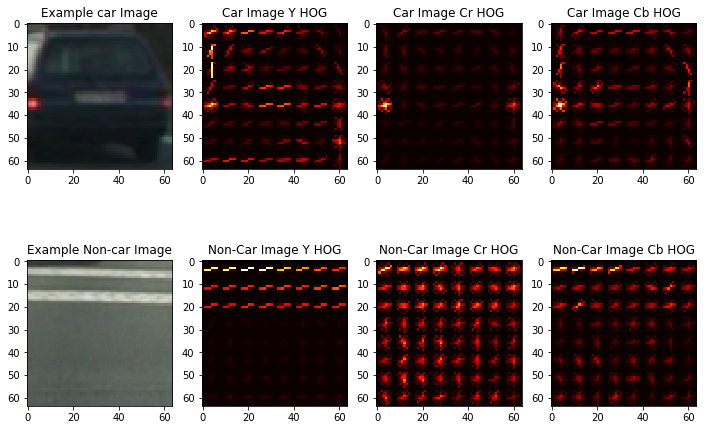

In [9]:
car_ind = np.random.randint(0, len(cars))
car_image_RGB = mpimg.imread(cars[car_ind])
car_image = cv2.cvtColor(car_image_RGB, cv2.COLOR_RGB2YCrCb)
_, car_dst_Y = get_hog_features(car_image[:,:,0], 9, 8, 8, vis=True, feature_vec=True)
_, car_dst_Cr = get_hog_features(car_image[:,:,1], 9, 8, 8, vis=True, feature_vec=True)
_, car_dst_Cb = get_hog_features(car_image[:,:,2], 9, 8, 8, vis=True, feature_vec=True)

notcar_ind = np.random.randint(0, len(notcars)) 
notcar_image_RGB = mpimg.imread(notcars[notcar_ind])
notcar_image = cv2.cvtColor(notcar_image_RGB, cv2.COLOR_RGB2YCrCb)
_, noncar_dst_Y = get_hog_features(notcar_image[:,:,0], 9, 8, 8, vis=True, feature_vec=True)
_, noncar_dst_Cr = get_hog_features(notcar_image[:,:,1], 9, 8, 8, vis=True, feature_vec=True)
_, noncar_dst_Cb = get_hog_features(notcar_image[:,:,2], 9, 8, 8, vis=True, feature_vec=True)

fig = plt.figure(figsize=(12,8))
plt.subplot(2,4,1)
plt.imshow(car_image_RGB)
plt.title('Example car Image')
plt.subplot(2,4,2)
plt.imshow(car_dst_Y, cmap = 'hot')
plt.title('Car Image Y HOG')
plt.subplot(2,4,3)
plt.imshow(car_dst_Cr, cmap = 'hot')
plt.title('Car Image Cr HOG')
plt.subplot(2,4,4)
plt.imshow(car_dst_Cb, cmap = 'hot')
plt.title('Car Image Cb HOG')
plt.subplot(2,4,5)
plt.imshow(notcar_image_RGB)
plt.title('Example Non-car Image')
plt.subplot(2,4,6)
plt.imshow(noncar_dst_Y, cmap = 'hot')
plt.title('Non-Car Image Y HOG')
plt.subplot(2,4,7)
plt.imshow(noncar_dst_Cr, cmap = 'hot')
plt.title('Non-Car Image Cr HOG')
plt.subplot(2,4,8)
plt.imshow(noncar_dst_Cb, cmap = 'hot')
plt.title('Non-Car Image Cb HOG')
plt.savefig("examples/Sample_HOG_data_YCrCb.png", bbox_inches='tight')

plt.show()

In [10]:
#        if color_space != 'RGB':
#            if color_space == 'HSV':
#                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
#            elif color_space == 'LUV':
#                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2LUV)
#            elif color_space == 'HLS':
#                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
#            elif color_space == 'YUV':
#                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
#            elif color_space == 'YCrCb':
#                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)
#        else: feature_image = np.copy(image) 

In [4]:
def convert_color(img, conv='RGB2YCrCb'):
    if conv == 'RGB2YCrCb':
        return cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    if conv == 'BGR2YCrCb':
        return cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
    if conv == 'RGB2LUV':
        return cv2.cvtColor(img, cv2.COLOR_RGB2LUV)


In [5]:
# Define a function to compute binned color features  
def bin_spatial(img, size=(32, 32)):
    # Use cv2.resize().ravel() to create the feature vector
    features = cv2.resize(img, size).ravel() 
    # Return the feature vector
    return features

In [6]:
# Define a function to compute color histogram features 
# NEED TO CHANGE bins_range if reading .png files with mpimg!
def color_hist(img, nbins=32, bins_range=(0, 32)):
    # Compute the histogram of the color channels separately
    channel1_hist = np.histogram(img[:,:,0], bins=nbins, range=bins_range)
    channel2_hist = np.histogram(img[:,:,1], bins=nbins, range=bins_range)
    channel3_hist = np.histogram(img[:,:,2], bins=nbins, range=bins_range)
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((channel1_hist[0], channel2_hist[0], channel3_hist[0]))
    # Return the individual histograms, bin_centers and feature vector
    return hist_features

Below Sections are for Learning features.

In [7]:
# Define a function to extract features from a list of images
# Have this function call bin_spatial() and color_hist()
def extract_features(imgs, color_space='RGB', spatial_size=(32, 32),
                        hist_bins=32, orient=9, 
                        pix_per_cell=8, cell_per_block=2, hog_channel=0,
                        spatial_feat=True, hist_feat=True, hog_feat=True):
    # Create a list to append feature vectors to
    features = []
    # Iterate through the list of images
    for file in imgs:
        file_features = []
        # Read in each one by one
        image = mpimg.imread(file)
        # apply color conversion if other than 'RGB'
        if color_space != 'RGB':
            if color_space == 'HSV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
            elif color_space == 'LUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2LUV)
            elif color_space == 'HLS':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
            elif color_space == 'YUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
            elif color_space == 'YCrCb':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)
        else: feature_image = np.copy(image)      

        if spatial_feat == True:
            spatial_features = bin_spatial(feature_image, size=spatial_size)
            file_features.append(spatial_features)
        if hist_feat == True:
            # Apply color_hist()
            hist_features = color_hist(feature_image, nbins=hist_bins)
            file_features.append(hist_features)
        if hog_feat == True:
        # Call get_hog_features() with vis=False, feature_vec=True
            if hog_channel == 'ALL':
                hog_features = []
                for channel in range(feature_image.shape[2]):
                    hog_features.append(get_hog_features(feature_image[:,:,channel], 
                                        orient, pix_per_cell, cell_per_block, 
                                        vis=False, feature_vec=True))
                hog_features = np.ravel(hog_features)        
            else:
                hog_features = get_hog_features(feature_image[:,:,hog_channel], orient, 
                            pix_per_cell, cell_per_block, vis=False, feature_vec=True)
            # Append the new feature vector to the features list
            file_features.append(hog_features)
        features.append(np.concatenate(file_features))
    # Return list of feature vectors
    return features

In [8]:
class FeaturesParameters():
    def __init__(self, colorspace = 'YCrCb', orient = 9, pix_per_cell = 8, cell_per_block = 2, hog_channel = "ALL", 
                 spatial = 32, histbin = 32, spatial_feat = True, hist_feat = True, hog_feat = True, svc = None, 
                 X_scaler = None, NumOfFeatures = 0, TimeToExtractHOG = 0, TimeToNormalize = 0, TimeToTrain = 0, 
                 TimeToPredict = 0, TestAccuracy = 0):
        self.colorspace = colorspace # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
        self.orient = orient
        self.pix_per_cell = pix_per_cell
        self.cell_per_block = cell_per_block
        self.hog_channel = hog_channel # Can be 0, 1, 2, or "ALL"
        self.spatial = spatial
        self.histbin = histbin
        self.spatial_feat = spatial_feat
        self.hist_feat = hist_feat
        self.hog_feat = hog_feat
        
        self.svc = svc
        self.X_scaler = X_scaler
        
        self.NumOfFeatures = NumOfFeatures
        self.TimeToExtractHOG = TimeToExtractHOG
        self.TimeToNormalize = TimeToNormalize
        self.TimeToTrain = TimeToTrain
        self.TimeToPredict = TimeToPredict
        self.TestAccuracy = TestAccuracy
        self.Name = "Param_" + str(self.colorspace) + "_" + str(self.spatial) + "s_" + \
        str(self.histbin) + "h_" + str(self.orient) + "o_" + str(self.pix_per_cell) + "p_" + str(self.cell_per_block) + \
        "c_" + str(self.hog_channel) + "g" + ".pkl"
        
    def UpdateParam(self,NumOfFeatures = 0, TimeToExtractHOG = 0, TimeToNormalize = 0, TimeToTrain = 0, TimeToPredict = 0, 
                    TestAccuracy = 0, svc = None, X_scaler = None):
        self.NumOfFeatures = NumOfFeatures
        self.TimeToExtractHOG = TimeToExtractHOG
        self.TimeToNormalize = TimeToNormalize
        self.TimeToTrain = TimeToTrain
        self.TimeToPredict = TimeToPredict
        self.TestAccuracy = TestAccuracy
        self.svc = svc
        self.X_scaler = X_scaler
        return
    
    def getName(self):
        return self.Name

In [9]:
import time

In [17]:
colorspace = 'YCrCb' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 9
pix_per_cell = 8
cell_per_block = 2
hog_channel = "ALL" # Can be 0, 1, 2, or "ALL"
spatial = 32
histbin = 32
spatial_feat = True
hist_feat = True
hog_feat = True

t=time.time()
n_samples = len(cars)
random_indexes = np.random.randint(0, len(cars), n_samples)
test_cars = np.array(cars)[random_indexes]
n_samples = len(notcars)
random_indexes = np.random.randint(0, len(notcars), n_samples)
test_notcars = np.array(notcars)[random_indexes]
car_features = extract_features(test_cars, color_space=colorspace, spatial_size=(spatial, spatial),
                        hist_bins=histbin, orient=orient, 
                        pix_per_cell=pix_per_cell, cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, hist_feat=hist_feat, hog_feat=hog_feat)
notcar_features = extract_features(test_notcars, color_space=colorspace, spatial_size=(spatial, spatial),
                        hist_bins=histbin, orient=orient, 
                        pix_per_cell=pix_per_cell, cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, hist_feat=hist_feat, hog_feat=hog_feat)
t2 = time.time()
TimeToExtractHOG = round(t2-t, 2)
print(TimeToExtractHOG, 'Seconds to extract HOG features...')


/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


139.22 Seconds to extract HOG features...


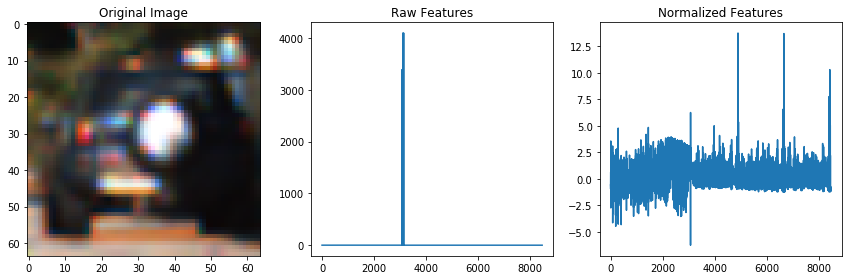

In [18]:
if len(car_features) > 0:
    # Create an array stack of feature vectors
    X = np.vstack((car_features, notcar_features)).astype(np.float64)                        
    # Fit a per-column scaler
    X_scaler = StandardScaler().fit(X)
    # Apply the scaler to X
    scaled_X = X_scaler.transform(X)
    car_ind = np.random.randint(0, len(test_cars))
    # Plot an example of raw and scaled features
    fig = plt.figure(figsize=(12,4))
    plt.subplot(131)
    plt.imshow(mpimg.imread(cars[car_ind]))
    plt.title('Original Image')
    plt.subplot(132)
    plt.plot(X[car_ind])
    plt.title('Raw Features')
    plt.subplot(133)
    plt.plot(scaled_X[car_ind])
    plt.title('Normalized Features')
    plt.savefig("examples/NormImg.png", bbox_inches='tight')
    fig.tight_layout()
else: 
    print('Your function only returns empty feature vectors...')

In [19]:
t=time.time()
# Create an array stack of feature vectors
X = np.vstack((car_features, notcar_features)).astype(np.float64)                        
# Fit a per-column scaler
X_scaler = StandardScaler().fit(X)
# Apply the scaler to X
scaled_X = X_scaler.transform(X)

# Define the labels vector
y = np.hstack((np.ones(len(car_features)), np.zeros(len(notcar_features))))
t2 = time.time()
TimeToNormalize = round(t2-t, 2)
print(TimeToNormalize, 'Seconds to Scale X features...')

4.49 Seconds to Scale X features...


In [20]:
# Split up data into randomized training and test sets
rand_state = np.random.randint(0, 100)
X_train, X_test, y_train, y_test = train_test_split(
    scaled_X, y, test_size=0.2, random_state=rand_state)

print('Using:',spatial, ' spatial binning, ',
    histbin,' histogram bins,', orient,' orientations, ',pix_per_cell,
    ' pixels per cell and, ', cell_per_block,'cells per block')
NumOfFeatures = len(X_train[0])
print('Feature vector length:', NumOfFeatures)

Using: 32  spatial binning,  32  histogram bins, 9  orientations,  8  pixels per cell and,  2 cells per block
Feature vector length: 8460


In [21]:
# Use a linear SVC 
svc = LinearSVC()
# Check the training time for the SVC
t=time.time()
svc.fit(X_train, y_train)
t2 = time.time()
TimeToTrain = round(t2-t, 2)
print(TimeToTrain, 'Seconds to train SVC...')
# Check the score of the SVC
TestAccuracy = round(svc.score(X_test, y_test), 4)
print('Test Accuracy of SVC = ', TestAccuracy)

35.5 Seconds to train SVC...
Test Accuracy of SVC =  0.9952


In [22]:
# Check the prediction time for a single sample
t=time.time()
n_predict = 10
print('My SVC predicts: ', svc.predict(X_test[0:n_predict]))
print('For these',n_predict, 'labels: ', y_test[0:n_predict])
t2 = time.time()
TimeToPredict = round(t2-t, 5)
print(TimeToPredict, 'Seconds to predict', n_predict,'labels with SVC')

My SVC predicts:  [ 0.  0.  1.  0.  1.  0.  0.  1.  0.  1.]
For these 10 labels:  [ 0.  0.  1.  0.  1.  0.  0.  1.  0.  1.]
0.00576 Seconds to predict 10 labels with SVC


In [24]:
SaveParam = FeaturesParameters(colorspace = colorspace, orient = orient, pix_per_cell = pix_per_cell, \
                               cell_per_block = cell_per_block, hog_channel = hog_channel, \
                               spatial = spatial, histbin = histbin, spatial_feat = spatial_feat, \
                               hist_feat = hist_feat, hog_feat = hog_feat)

print(SaveParam.getName())
SaveParam.UpdateParam(NumOfFeatures = NumOfFeatures, TimeToExtractHOG = TimeToExtractHOG, TimeToNormalize = TimeToNormalize, \
                      TimeToTrain = TimeToTrain, TimeToPredict = TimeToPredict, TestAccuracy = TestAccuracy, svc = svc, \
                      X_scaler = X_scaler)

Param_YCrCb_32s_32h_9o_8p_2c_ALLg.pkl


In [25]:
joblib.dump(SaveParam, SaveParam.getName())
feature = joblib.load(SaveParam.getName())
print(feature.getName())
print(feature.TimeToPredict)

Param_YCrCb_32s_32h_9o_8p_2c_ALLg.pkl
0.00576


In [26]:
# Reload and verify
# Check the prediction time for a single sample
t=time.time()
n_predict = 10
print('My SVC predicts: ', feature.svc.predict(X_test[0:n_predict]))
print('For these',n_predict, 'labels: ', y_test[0:n_predict])
t2 = time.time()
print(round(t2-t, 5), 'Seconds to predict', n_predict,'labels with SVC')

My SVC predicts:  [ 0.  0.  1.  0.  1.  0.  0.  1.  0.  1.]
For these 10 labels:  [ 0.  0.  1.  0.  1.  0.  0.  1.  0.  1.]
0.00454 Seconds to predict 10 labels with SVC


In [27]:
# now you can save it to a file
#joblib.dump(svc, 'svc_classifier.pkl')
#joblib.dump(X_scaler, 'X_scaler.pkl')

In [10]:
# Define a function that takes an image,
# start and stop positions in both x and y, 
# window size (x and y dimensions),  
# and overlap fraction (for both x and y)
def slide_window(img, x_start_stop=[None, None], y_start_stop=[None, None], 
                    xy_window=(64, 64), xy_overlap=(0.5, 0.5)):
    # If x and/or y start/stop positions not defined, set to image size
    if x_start_stop[0] == None:
        x_start_stop[0] = 0
    if x_start_stop[1] == None:
        x_start_stop[1] = img.shape[1]
    if y_start_stop[0] == None:
        y_start_stop[0] = 0
    if y_start_stop[1] == None:
        y_start_stop[1] = img.shape[0]
    # Compute the span of the region to be searched    
    xspan = x_start_stop[1] - x_start_stop[0]
    yspan = y_start_stop[1] - y_start_stop[0]
    # Compute the number of pixels per step in x/y
    nx_pix_per_step = np.int(xy_window[0]*(1 - xy_overlap[0]))
    ny_pix_per_step = np.int(xy_window[1]*(1 - xy_overlap[1]))
    # Compute the number of windows in x/y
    nx_buffer = np.int(xy_window[0]*(xy_overlap[0]))
    ny_buffer = np.int(xy_window[1]*(xy_overlap[1]))
    nx_windows = np.int((xspan-nx_buffer)/nx_pix_per_step) 
    ny_windows = np.int((yspan-ny_buffer)/ny_pix_per_step) 
    # Initialize a list to append window positions to
    window_list = []
    # Loop through finding x and y window positions
    # Note: you could vectorize this step, but in practice
    # you'll be considering windows one by one with your
    # classifier, so looping makes sense
    for ys in range(ny_windows):
        for xs in range(nx_windows):
            # Calculate window position
            startx = xs*nx_pix_per_step + x_start_stop[0]
            endx = startx + xy_window[0]
            starty = ys*ny_pix_per_step + y_start_stop[0]
            endy = starty + xy_window[1]
            
            # Append window position to list
            window_list.append(((startx, starty), (endx, endy)))
    # Return the list of windows
    return window_list

In [11]:
# Define a function to extract features from a single image window
# This function is very similar to extract_features()
# just for a single image rather than list of images
def single_img_features(img, color_space='YCrCb', spatial_size=(32, 32),
                        hist_bins=32, orient=9, 
                        pix_per_cell=8, cell_per_block=2, hog_channel=0,
                        spatial_feat=True, hist_feat=True, hog_feat=True):    
    #1) Define an empty list to receive features
    img_features = []
    #2) Apply color conversion if other than 'RGB'
    if color_space != 'RGB':
        if color_space == 'HSV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
        elif color_space == 'LUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
        elif color_space == 'HLS':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
        elif color_space == 'YUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
        elif color_space == 'YCrCb':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    else: feature_image = np.copy(img)      
    #3) Compute spatial features if flag is set
    if spatial_feat == True:
        spatial_features = bin_spatial(feature_image, size=spatial_size)
        #4) Append features to list
        img_features.append(spatial_features)
    #5) Compute histogram features if flag is set
    if hist_feat == True:
        hist_features = color_hist(feature_image, nbins=hist_bins)
        #6) Append features to list
        img_features.append(hist_features)
    #7) Compute HOG features if flag is set
    if hog_feat == True:
        if hog_channel == 'ALL':
            hog_features = []
            for channel in range(feature_image.shape[2]):
                hog_features.extend(get_hog_features(feature_image[:,:,channel], 
                                    orient, pix_per_cell, cell_per_block, 
                                    vis=False, feature_vec=True))      
        else:
            hog_features = get_hog_features(feature_image[:,:,hog_channel], orient, 
                        pix_per_cell, cell_per_block, vis=False, feature_vec=True)
        #8) Append features to list
        img_features.append(hog_features)

    #9) Return concatenated array of features
    return np.concatenate(img_features)

In [12]:
# Define a function you will pass an image 
# and the list of windows to be searched (output of slide_windows())
def search_windows(img, windows, clf, scaler, color_space='YCrCb', 
                    spatial_size=(32, 32), hist_bins=32, 
                    hist_range=(0, 32), orient=9, 
                    pix_per_cell=8, cell_per_block=2, 
                    hog_channel=0, spatial_feat=True, 
                    hist_feat=True, hog_feat=True):

    #1) Create an empty list to receive positive detection windows
    on_windows = []
    #2) Iterate over all windows in the list
    for window in windows:
        #3) Extract the test window from original image
        test_img = cv2.resize(img[window[0][1]:window[1][1], window[0][0]:window[1][0]], (64, 64))      
        #4) Extract features for that window using single_img_features()
        features = single_img_features(test_img, color_space=color_space, 
                            spatial_size=spatial_size, hist_bins=hist_bins, 
                            orient=orient, pix_per_cell=pix_per_cell, 
                            cell_per_block=cell_per_block, 
                            hog_channel=hog_channel, spatial_feat=spatial_feat, 
                            hist_feat=hist_feat, hog_feat=hog_feat)
        #5) Scale extracted features to be fed to classifier
        test_features = scaler.transform(np.array(features).reshape(1, -1))
        #6) Predict using your classifier
        prediction = clf.predict(test_features)
        #7) If positive (prediction == 1) then save the window
        if prediction == 1:
            on_windows.append(window)
    #8) Return windows for positive detections
    return on_windows

In [13]:
def draw_boxes(img, bboxes, color=(0, 0, 255), thick=6):
    # Make a copy of the image
    imcopy = np.copy(img)
    # Iterate through the bounding boxes
    for bbox in bboxes:
        # Draw a rectangle given bbox coordinates
        cv2.rectangle(imcopy, bbox[0], bbox[1], color, thick)
    # Return the image copy with boxes drawn
    return imcopy

/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


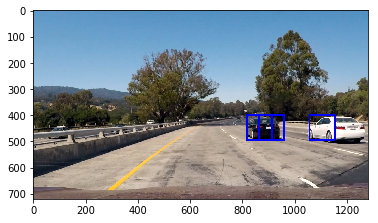

In [14]:
#LoadedParams = joblib.load('parameters/Param_YCrCb_32s_32h_9o_8p_2c_ALLg.pkl')
LoadedParams = joblib.load('Param_YCrCb_32s_32h_9o_8p_2c_ALLg.pkl')

image = mpimg.imread('test_images/test1.jpg')
draw_image = np.copy(image)

# Uncomment the following line if you extracted training
# data from .png images (scaled 0 to 1 by mpimg) and the
# image you are searching is a .jpg (scaled 0 to 255)
image = image.astype(np.float32)/255

y_start_stop = [400,700]
xy_overlap = (0.5,0.5)
xy_window = (96,96)

windows = slide_window(image, x_start_stop=[None, None], y_start_stop=y_start_stop, 
                    xy_window=xy_window, xy_overlap=xy_overlap)

hot_windows = search_windows(image, windows, LoadedParams.svc, LoadedParams.X_scaler, color_space= LoadedParams.colorspace, 
                        spatial_size=(LoadedParams.spatial,LoadedParams.spatial), hist_bins=LoadedParams.histbin, 
                        orient=LoadedParams.orient, pix_per_cell= LoadedParams.pix_per_cell, 
                        cell_per_block= LoadedParams.cell_per_block, 
                        hog_channel= LoadedParams.hog_channel, spatial_feat=LoadedParams.spatial_feat, 
                        hist_feat= LoadedParams.hist_feat, hog_feat= LoadedParams.hog_feat)                       

window_img = draw_boxes(draw_image, hot_windows, color=(0, 0, 255), thick=6)                    
plt.savefig("examples/SlidingWindowSearch.png", bbox_inches='tight')
plt.imshow(window_img)

In [15]:
# Define a single function that can extract features using hog sub-sampling and make predictions
def find_cars(img, ystart, ystop, scale, svc, X_scaler, color_space='YCrCb', spatial_size=(32, 32),
                        hist_bins=32, orient=9, 
                        pix_per_cell=8, cell_per_block=2, hog_channel=0,
                        spatial_feat=True, hist_feat=True, hog_feat=True ):
    
    draw_img = np.copy(img)
    img = img.astype(np.float32)/255
    img_boxes = []
    img_tosearch = img[ystart:ystop,:,:]
    
    #ctrans_tosearch = convert_color(img_tosearch, conv='RGB2YCrCb')
    
    if color_space != 'RGB':
        if color_space == 'HSV':
            ctrans_tosearch = cv2.cvtColor(img_tosearch, cv2.COLOR_RGB2HSV)
        elif color_space == 'LUV':
            ctrans_tosearch = cv2.cvtColor(img_tosearch, cv2.COLOR_RGB2LUV)
        elif color_space == 'HLS':
            ctrans_tosearch = cv2.cvtColor(img_tosearch, cv2.COLOR_RGB2HLS)
        elif color_space == 'YUV':
            ctrans_tosearch = cv2.cvtColor(img_tosearch, cv2.COLOR_RGB2YUV)
        elif color_space == 'YCrCb':
            ctrans_tosearch = cv2.cvtColor(img_tosearch, cv2.COLOR_RGB2YCrCb)
    else: ctrans_tosearch = np.copy(img_tosearch) 
        
    if scale != 1:
        imshape = ctrans_tosearch.shape
        ctrans_tosearch = cv2.resize(ctrans_tosearch, (np.int(imshape[1]/scale), np.int(imshape[0]/scale)))
        
    ch1 = ctrans_tosearch[:,:,0]
    ch2 = ctrans_tosearch[:,:,1]
    ch3 = ctrans_tosearch[:,:,2]

    # Define blocks and steps as above
    nxblocks = (ch1.shape[1] // pix_per_cell) - cell_per_block + 1
    nyblocks = (ch1.shape[0] // pix_per_cell) - cell_per_block + 1 
    nfeat_per_block = orient*cell_per_block**2
    
    # 64 was the orginal sampling rate, with 8 cells and 8 pix per cell
    window = 64
    nblocks_per_window = (window // pix_per_cell) - cell_per_block + 1
    cells_per_step = 2  # Instead of overlap, define how many cells to step
    nxsteps = (nxblocks - nblocks_per_window) // cells_per_step + 1
    nysteps = (nyblocks - nblocks_per_window) // cells_per_step + 1
    
    # Compute individual channel HOG features for the entire image
    hog1 = get_hog_features(ch1, orient, pix_per_cell, cell_per_block, feature_vec=False)
    hog2 = get_hog_features(ch2, orient, pix_per_cell, cell_per_block, feature_vec=False)
    hog3 = get_hog_features(ch3, orient, pix_per_cell, cell_per_block, feature_vec=False)
    
    for xb in range(nxsteps):
        for yb in range(nysteps):
            ypos = yb*cells_per_step
            xpos = xb*cells_per_step
            # Extract HOG for this patch
            hog_feat1 = hog1[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_feat2 = hog2[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_feat3 = hog3[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_features = np.hstack((hog_feat1, hog_feat2, hog_feat3))

            xleft = xpos*pix_per_cell
            ytop = ypos*pix_per_cell

            # Extract the image patch
            subimg = cv2.resize(ctrans_tosearch[ytop:ytop+window, xleft:xleft+window], (64,64))
          
            # Get color features
            spatial_features = bin_spatial(subimg, size=spatial_size)
            hist_features = color_hist(subimg, nbins=hist_bins)

            # Scale features and make a prediction
            test_features = X_scaler.transform(np.hstack((spatial_features, hist_features, hog_features)).reshape(1, -1))    
            test_prediction = svc.predict(test_features)
            
            if test_prediction == 1:
                xbox_left = np.int(xleft*scale)
                ytop_draw = np.int(ytop*scale)
                win_draw = np.int(window*scale)
                cv2.rectangle(draw_img,(xbox_left, ytop_draw+ystart),(xbox_left+win_draw,ytop_draw+win_draw+ystart),(0,0,255),6) 
                img_boxes.append(((xbox_left, ytop_draw+ystart),(xbox_left+win_draw,ytop_draw+win_draw+ystart)))
                
    return draw_img, img_boxes

/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


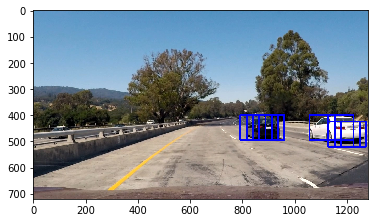

In [16]:
img = mpimg.imread('test_images/test1.jpg')
ystart = 400
ystop = 656
scale = 1.5

out_img,box_list = find_cars(img, ystart, ystop, scale, LoadedParams.svc, LoadedParams.X_scaler, color_space= LoadedParams.colorspace, 
                        spatial_size=(LoadedParams.spatial,LoadedParams.spatial), hist_bins=LoadedParams.histbin, 
                        orient=LoadedParams.orient, pix_per_cell= LoadedParams.pix_per_cell, 
                        cell_per_block= LoadedParams.cell_per_block, 
                        hog_channel= LoadedParams.hog_channel, spatial_feat=LoadedParams.spatial_feat, 
                        hist_feat= LoadedParams.hist_feat, hog_feat= LoadedParams.hog_feat)

plt.imshow(out_img)
plt.savefig("examples/FindCars_01_" +str(scale) +".png", bbox_inches='tight')

In [17]:
def add_heat(heatmap, bbox_list):
    # Iterate through list of bboxes
    for box in bbox_list:
        # Add += 1 for all pixels inside each bbox
        # Assuming each "box" takes the form ((x1, y1), (x2, y2))
        heatmap[box[0][1]:box[1][1], box[0][0]:box[1][0]] += 1

    # Return updated heatmap
    return heatmap# Iterate through list of bboxes

In [18]:
def apply_threshold(heatmap, threshold):
    # Zero out pixels below the threshold
    heatmap[heatmap <= threshold] = 0
    # Return thresholded map
    return heatmap

In [19]:
def draw_labeled_bboxes(img, labels):
    bbox = None
    # Iterate through all detected cars
    for car_number in range(1, labels[1]+1):
        # Find pixels with each car_number label value
        nonzero = (labels[0] == car_number).nonzero()
        # Identify x and y values of those pixels
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        # Define a bounding box based on min/max x and y
        bbox = ((np.min(nonzerox), np.min(nonzeroy)), (np.max(nonzerox), np.max(nonzeroy)))
        # Draw the box on the image
        cv2.rectangle(img, bbox[0], bbox[1], (0,0,255), 6)
    # Return the image
    return img, bbox

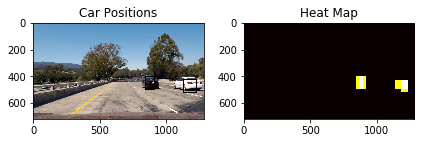

In [20]:
heat = np.zeros_like(image[:,:,0]).astype(np.float)

# Add heat to each box in box list
heat = add_heat(heat,box_list)
    
# Apply threshold to help remove false positives
heat = apply_threshold(heat,2)

# Visualize the heatmap when displaying    
heatmap = np.clip(heat, 0, 255)

# Find final boxes from heatmap using label function
labels = label(heatmap)
draw_img, bbox = draw_labeled_bboxes(np.copy(image), labels)

fig = plt.figure()
plt.subplot(121)
plt.imshow(draw_img)
plt.title('Car Positions')
plt.subplot(122)
plt.imshow(heatmap, cmap='hot')
plt.title('Heat Map')
plt.savefig("examples/HeatMap_2.png", bbox_inches='tight')
fig.tight_layout()

In [97]:
#svc = joblib.load('svc_classifier.pkl')
#X_scaler = joblib.load('X_scaler.pkl')

In [98]:
#dist_pickle = pickle.load( open("svc_pickle.p", "rb" ) )
#svc = dist_pickle["svc"]
#X_scaler = dist_pickle["scaler"]
#orient = dist_pickle["orient"]
#pix_per_cell = dist_pickle["pix_per_cell"]
#cell_per_block = dist_pickle["cell_per_block"]
#spatial_size = dist_pickle["spatial_size"]
#hist_bins = dist_pickle["hist_bins"]

In [21]:
class Vehicles():
    def __init__(self):
        self.recent_heat = [] 
        self.smooth_factor = 15
Veh = Vehicles()       

In [22]:
def Process_Windows(image, heat, heat_threshold = 1, ystart = 400, ystop = 656, scale = 1.5):
    
    out_img,box_list = find_cars(image, ystart, ystop, scale, LoadedParams.svc, LoadedParams.X_scaler, color_space= LoadedParams.colorspace, 
                        spatial_size=(LoadedParams.spatial,LoadedParams.spatial), hist_bins=LoadedParams.histbin, 
                        orient=LoadedParams.orient, pix_per_cell= LoadedParams.pix_per_cell, 
                        cell_per_block= LoadedParams.cell_per_block, 
                        hog_channel= LoadedParams.hog_channel, spatial_feat=LoadedParams.spatial_feat, 
                        hist_feat= LoadedParams.hist_feat, hog_feat= LoadedParams.hog_feat)

    
    # Add heat to each box in box list
    heat = add_heat(heat,box_list)
    
    # Apply threshold to help remove false positives
    heat = apply_threshold(heat,heat_threshold)
    
    return out_img, heat

In [23]:
def Frame_Process(image,vid = 1):
        
    heat = np.zeros_like(image[:,:,0]).astype(np.float)
    
    
    ystart = 400
    ystop = 656
    scale = 1

    out_img,box_list = find_cars(image, ystart, ystop, scale, LoadedParams.svc, LoadedParams.X_scaler, color_space= LoadedParams.colorspace, 
                        spatial_size=(LoadedParams.spatial,LoadedParams.spatial), hist_bins=LoadedParams.histbin, 
                        orient=LoadedParams.orient, pix_per_cell= LoadedParams.pix_per_cell, 
                        cell_per_block= LoadedParams.cell_per_block, 
                        hog_channel= LoadedParams.hog_channel, spatial_feat=LoadedParams.spatial_feat, 
                        hist_feat= LoadedParams.hist_feat, hog_feat= LoadedParams.hog_feat)

    
    # Add heat to each box in box list
    heat = add_heat(heat,box_list)
    
    # Apply threshold to help remove false positives
    #heat = apply_threshold(heat,1)
    
    ystart = 400
    ystop = 656
    scale = 1.5
    
    out_img,box_list = find_cars(image, ystart, ystop, scale, LoadedParams.svc, LoadedParams.X_scaler, color_space= LoadedParams.colorspace, 
                        spatial_size=(LoadedParams.spatial,LoadedParams.spatial), hist_bins=LoadedParams.histbin, 
                        orient=LoadedParams.orient, pix_per_cell= LoadedParams.pix_per_cell, 
                        cell_per_block= LoadedParams.cell_per_block, 
                        hog_channel= LoadedParams.hog_channel, spatial_feat=LoadedParams.spatial_feat, 
                        hist_feat= LoadedParams.hist_feat, hog_feat= LoadedParams.hog_feat)

    
    # Add heat to each box in box list
    heat = add_heat(heat,box_list)
    
    # Apply threshold to help remove false positives
    #heat = apply_threshold(heat,2)
    
    ystart = 400
    ystop = 656
    scale = 2
    
    out_img,box_list = find_cars(image, ystart, ystop, scale, LoadedParams.svc, LoadedParams.X_scaler, color_space= LoadedParams.colorspace, 
                        spatial_size=(LoadedParams.spatial,LoadedParams.spatial), hist_bins=LoadedParams.histbin, 
                        orient=LoadedParams.orient, pix_per_cell= LoadedParams.pix_per_cell, 
                        cell_per_block= LoadedParams.cell_per_block, 
                        hog_channel= LoadedParams.hog_channel, spatial_feat=LoadedParams.spatial_feat, 
                        hist_feat= LoadedParams.hist_feat, hog_feat= LoadedParams.hog_feat)

    
    # Add heat to each box in box list
    heat = add_heat(heat,box_list)
    
    # Apply threshold to help remove false positives
    #heat = apply_threshold(heat,1)
    
        
    ystart = 400
    ystop = 656
    scale = 2.4
    
    out_img,box_list = find_cars(image, ystart, ystop, scale, LoadedParams.svc, LoadedParams.X_scaler, color_space= LoadedParams.colorspace, 
                        spatial_size=(LoadedParams.spatial,LoadedParams.spatial), hist_bins=LoadedParams.histbin, 
                        orient=LoadedParams.orient, pix_per_cell= LoadedParams.pix_per_cell, 
                        cell_per_block= LoadedParams.cell_per_block, 
                        hog_channel= LoadedParams.hog_channel, spatial_feat=LoadedParams.spatial_feat, 
                        hist_feat= LoadedParams.hist_feat, hog_feat= LoadedParams.hog_feat)

    
    # Add heat to each box in box list
    heat = add_heat(heat,box_list)
    
    # Apply threshold to help remove false positives
    heat = apply_threshold(heat,1)
    
    if(vid == 1):
        Veh.recent_heat.append(heat)
        heat_sum = np.average(Veh.recent_heat[-Veh.smooth_factor:],axis = 0)
        heat_sum = apply_threshold(heat_sum,2)
    else:
        heat_sum = heat

    # Visualize the heatmap when displaying    
    heatmap = np.clip(heat_sum, 0, 255)

    # Find final boxes from heatmap using label function
    labels = label(heatmap)
    draw_img, bbox = draw_labeled_bboxes(np.copy(image), labels)
    
    # Use bbox for Vehicle Class.
    
    return draw_img

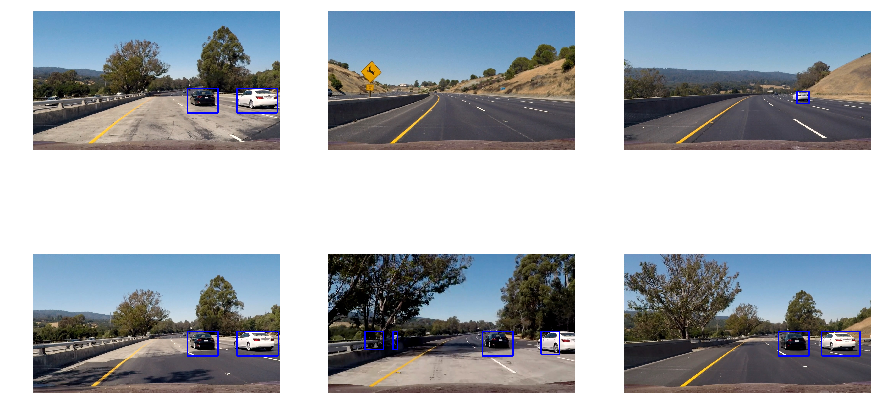

In [104]:
fnames = glob.glob('test_images/test*.jpg', recursive = True)
max_files = len(fnames)
file_index = 0
rows = 10
columns = 3
fig = plt.figure(figsize=(15,44))
count = 1

ystart = 400
ystop = 656
scale = 1.5
heat_threshold = 1

for idx, fname in enumerate(fnames):
    if idx < 0:
        continue
    if idx >= 10:
        break
    Img = mpimg.imread(fname)
    if True:
        draw_img = Frame_Process(Img, 0)
    else:
        heat = np.zeros_like(Img[:,:,0]).astype(np.float)

        out, heat = Process_Windows(Img, heat, heat_threshold = heat_threshold, ystart = ystart, ystop = ystop, scale = scale)
        # Visualize the heatmap when displaying    
        heatmap = np.clip(heat, 0, 255)

        # Find final boxes from heatmap using label function
        labels = label(heatmap)
        draw_img, bbox = draw_labeled_bboxes(np.copy(Img), labels)

        splt = plt.subplot(rows, columns, count)
        plt.axis('off')
        splt.imshow(out)

        count+=1

        splt = plt.subplot(rows, columns, count)
        plt.axis('off')
        splt.imshow(heatmap, cmap='hot')

        count+=1
    
    splt = plt.subplot(rows, columns, count)
    plt.axis('off')
    splt.imshow(draw_img, cmap='hot')
    
    count+=1

    
plt.savefig("examples/Test_outputs.png", bbox_inches='tight')
plt.show()

In [24]:
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [27]:
Veh = Vehicles()       
Output_video = 'test_video_out.mp4'
#Input_video = 'project_video_21_24.mp4'
Input_video = 'test_video.mp4'
clip = VideoFileClip(Input_video)
video_clip = clip.fl_image(Frame_Process)
video_clip.write_videofile(Output_video, audio = False)

[MoviePy] >>>> Building video test_video_out.mp4
[MoviePy] Writing video test_video_out.mp4


 97%|█████████▋| 38/39 [01:35<00:02,  2.51s/it]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_video_out.mp4 



In [28]:
HTML("""
<video width="960" height="540" controls>
    <source src="{0}">
</video>
""".format(Output_video))

In [25]:
Veh = Vehicles()       
Output_video = 'project_video_out.mp4'
Input_video = 'project_video.mp4'
#Input_video = 'project_video_20_30.mp4'
clip = VideoFileClip(Input_video)
video_clip = clip.fl_image(Frame_Process)
video_clip.write_videofile(Output_video, audio = False)

[MoviePy] >>>> Building video project_video_out.mp4
[MoviePy] Writing video project_video_out.mp4


100%|█████████▉| 1260/1261 [51:08<00:02,  2.46s/it]


[MoviePy] Done.
[MoviePy] >>>> Video ready: project_video_out.mp4 



In [26]:
HTML("""
<video width="960" height="540" controls>
    <source src="{0}">
</video>
""".format(Output_video))